# 0. Install Dependencies and Bring in Data

In [1]:
!pip install tensorflow 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv')

'jigsaw-toxic-comment-classification-challenge/train.csv/train.csv'

In [5]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
df[df.columns]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
df[df['toxic']==1].head()
df.shape

(159571, 8)

# 1. Preprocess

In [10]:
!pip list

/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Package                         Version
------------------------------- --------------------
absl-py                         2.0.0
aiobotocore                     2.5.0
aiofiles                        22.1.0
aiohttp                         3.8.3
aioitertools                    0.7.1
aiosignal                       1.2.0
aiosqlite                       0.18.0
alabaster                       0.7.12
altair                          5.3.0
anaconda-catalogs               0.2.0
anaconda-client                 1.11.3
anaconda-navigator              2.4.2
anaconda-project                0.11.1
annotated-types                 0.6.0
antlr4-python3-runtime          4.9.3
anyio                           3.5.0
appdirs                         1.4.4
applaunchservices               0.3.0
appnope                         0.1.2
appscript                       1.1.2
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.3
astroid                   

In [11]:
from tensorflow.keras.layers import TextVectorization
#tokenization

In [12]:
help(TextVectorization)

Help on class TextVectorization in module keras.src.layers.preprocessing.text_vectorization:

class TextVectorization(keras.src.engine.base_preprocessing_layer.PreprocessingLayer)
 |  TextVectorization(max_tokens=None, standardize='lower_and_strip_punctuation', split='whitespace', ngrams=None, output_mode='int', output_sequence_length=None, pad_to_max_tokens=False, vocabulary=None, idf_weights=None, sparse=False, ragged=False, encoding='utf-8', **kwargs)
 |  
 |  A preprocessing layer which maps text features to integer sequences.
 |  
 |  This layer has basic options for managing text in a Keras model. It
 |  transforms a batch of strings (one example = one string) into either a list
 |  of token indices (one example = 1D tensor of integer token indices) or a
 |  dense representation (one example = 1D tensor of float values representing
 |  data about the example's tokens). This layer is meant to handle natural
 |  language inputs. To handle simple string inputs (categorical strings o

In [13]:
X = df['comment_text']
y = df[df.columns[2:]].values
print(X)

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [14]:
MAX_FEATURES = 200000 # number of words in the vocab

In [15]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [16]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [17]:
vectorizer.adapt(X.values)

In [18]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [19]:
vectorized_text = vectorizer(X.values)

In [20]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#datapipelines
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [21]:
dataset.as_numpy_iterator().next()

(array([[    8,    19,  1641, ...,     0,     0,     0],
        [  176,     6,   531, ...,     0,     0,     0],
        [  312,  1081,     2, ...,     0,     0,     0],
        ...,
        [    8,   253,    10, ...,     0,     0,     0],
        [   16,   181,   185, ...,     0,     0,     0],
        [ 1458,  1911, 10265, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [22]:
batch_X,batch_y = dataset.as_numpy_iterator().next()

In [23]:
int(len(dataset)*.7)

6981

In [24]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [25]:
len(test)

997

In [26]:
train_generator = train.as_numpy_iterator()

In [27]:
train_generator.next()

(array([[188109,    775,  80517, ...,      0,      0,      0],
        [    76,     33,      7, ...,      0,      0,      0],
        [ 15987,     73,     33, ...,      0,      0,      0],
        ...,
        [    30,    564,     31, ...,      0,      0,      0],
        [    13,     21,    101, ...,      0,      0,      0],
        [   104,     12,     47, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# 2. Create Sequential Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [29]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [30]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [32]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 3421s 490ms/step - loss: 0.0618 - val_loss: 0.0438


In [33]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

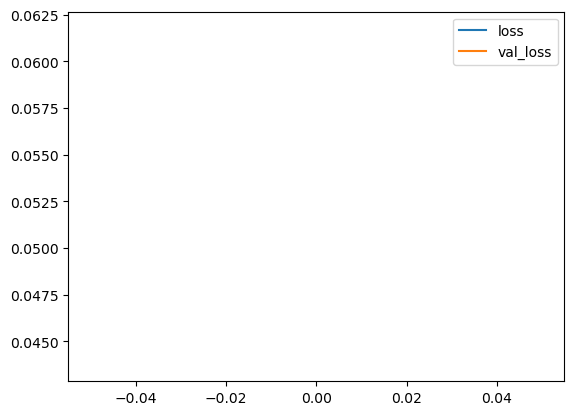

In [34]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [35]:
input_text = vectorizer('You freaking shit! I am going to slap you.')

In [36]:
batch = test.as_numpy_iterator().next()
#give the next batch 

In [37]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  318, ...,    0,    0,    0])>

In [38]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [39]:
np.expand_dims(input_text,0)

array([[   7, 7158,  318, ...,    0,    0,    0]])

In [40]:
res = model.predict(np.expand_dims(input_text,0))
print(res)

1/1 [==============================] - 1s 687ms/step
[[0.9966768  0.29948354 0.9604119  0.01282061 0.851451   0.07774703]]


In [41]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [42]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [43]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [44]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 79ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
res.shape

(1, 6)

In [46]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 79ms/step


In [47]:
res.flatten()

array([3.06110969e-03, 1.47953756e-07, 1.62066659e-04, 1.58169005e-05,
       4.28648309e-05, 1.95514694e-05, 1.12527823e-02, 2.85600299e-06,
       9.77266114e-04, 1.15389987e-04, 3.90569243e-04, 1.49385043e-04,
       1.57818943e-02, 6.13545080e-06, 1.57813507e-03, 1.94628214e-04,
       6.93432579e-04, 2.55022489e-04, 1.23451848e-03, 1.77079400e-08,
       5.14982203e-05, 3.55459429e-06, 1.01598289e-05, 4.74451190e-06,
       3.84642067e-03, 2.42400432e-07, 2.43805189e-04, 2.09456284e-05,
       6.94785631e-05, 2.83411464e-05, 7.73235084e-03, 1.23793336e-06,
       6.05116773e-04, 6.50070942e-05, 2.13535226e-04, 8.50032593e-05,
       1.41670427e-03, 2.37965274e-08, 6.50828297e-05, 4.26188353e-06,
       1.34401598e-05, 5.91242679e-06, 5.87151153e-03, 6.82848622e-07,
       3.54971475e-04, 4.58774266e-05, 1.16326613e-04, 5.38574532e-05,
       2.45652045e-03, 8.89681573e-08, 1.26954270e-04, 1.07633805e-05,
       3.12028933e-05, 1.40716920e-05, 1.65826001e-03, 3.46108671e-08,
      

# 4. Evaluate Model

In [48]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 73ms/step


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.808080792427063, Recall:0.7195420861244202, Accuracy:0.47442325949668884


# 5. Test and Gradio

In [52]:
!pip install gradio jinja2

/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [53]:
conda install -c conda-forge fsspec

Retrieving notices: ...working... done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-arm64::jupyterlab_server==2.22.0=py311hca03da5_0
  - defaults/osx-arm64::notebook==6.5.4=py311hca03da5_0
  - defaults/osx-arm64::scikit-image==0.20.0=py311h313beb8_0
  - defaults/osx-arm64::anaconda-client==1.11.3=py311hca03da5_0
  - defaults/osx-arm64::matplotlib-base==3.7.1=py311h7aedaa7_1
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - defaults/osx-arm64::conda-repo-cli==1.0.41=py311hca03da5_0
  - defaults/osx-arm64::anaconda-project==0.11.1=py311hca03da5_0
  - defaults/osx-arm64::python-lsp-black==1.2.1=py311hca03da5_0
  - defaults/osx-arm64::pyqt==5.15.7=py311h313beb8_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/noarch::itemloaders==1.0.4=pyhd3eb1b0_1
  - defaults/osx-arm64::bokeh==3.1.1=py311hb6e6a13_0
  - defaults/osx-arm64::anaconda-catalo

In [54]:
pip install typing-extensions==3.10.0.2

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-core 2.18.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 3.10.0.2 which is incompatible.
pydantic 2.7.1 requires typing-extensions>=4.6.1, but you have typing-extensions 3.10.0.2 which is incompatible.
fastapi 0.110.3 requires typing-extensions>=4.8.0, but you have typing-extensions 3.10.0.2 which is incompatible.
gradio 4.28.3 requires typing-extensions~=4.0, but you have typing-extensions 3.10.0.2 which is incompatible.
gradio-client 0.16.0 requires typing-extensions~=4.0, but you have typing-extensions 3.10.0.2 which is incompatible.

[notice] A new release of pip is available: 

In [55]:
pip install --upgrade pydantic fastapi gradio gradio-client


SyntaxError: invalid syntax (4083963235.py, line 1)

In [ ]:
pip install --upgrade torch==2.2.2


In [ ]:
pip install --upgrade typing-extensions


In [56]:
import tensorflow as tf
import gradio as gr

In [57]:
!pip list | grep fastapi


/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


fastapi                         0.110.3

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [58]:
!pip install --upgrade fastapi typing_extensions

/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 1.5 MB/s eta 0:00:0000:01
  Attempting uninstall: typing_extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.110.3
    Uninstalling fastapi-0.110.3:
      Successfully uninstalled fastapi-0.110.3

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [59]:
model.save('toxicity.h5')

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
model = tf.keras.models.load_model('toxicity.h5')

In [61]:
input_str = vectorizer('hey i freaken hate you! i\'m gonna hurt you')


In [62]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [63]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 3s 3s/step


In [64]:
res

array([[0.8493188 , 0.03558955, 0.46852475, 0.02467834, 0.4386226 ,
        0.04971454]], dtype=float32)

In [65]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [66]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [67]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Running on public URL: https://86f58448606526aabd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
